In [1]:
import cv2 as cv
import numpy as np

#Detect edges

img = cv.imread("chess.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
corn = cv.cornerHarris(gray, 2,11,0.04)
img[corn>0.01*corn.max()]=[0,0,255]


cv.imshow("corner", img)
cv.imwrite("Uppg5_1.jpg", img)
cv.waitKey(0)
cv.destroyAllWindows()



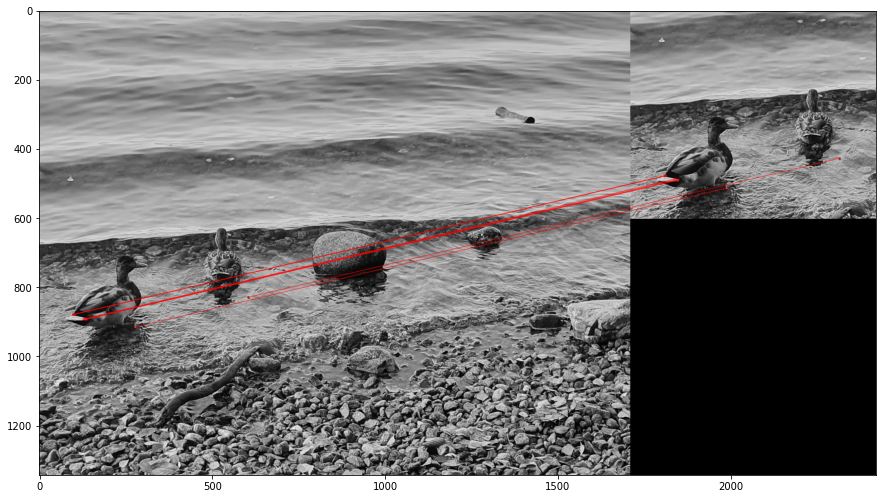

In [2]:
import matplotlib.pyplot as plt

#Detect similarities
img1 = cv.imread("ducks.jpg", 0)
img2 = cv.imread("zoom_ducks.jpg", 0)

# Initiate orb detector and find keypoints and descriptors with orb
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1,des2)

# Sort descriptors in order of distance
matches = sorted(matches, key = lambda x:x.distance)

# Show first 10 matches
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,matchColor=255,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 15))
plt.imshow(img3)
plt.show()


In [5]:
# Read image
img = cv.imread("shapes.png", 0)

# Find contours
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Convert back to color to draw contours in red
img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

# Loop through contours
for c in contours:
    # Approx 5% to get corners of shapes
    epsilon = 0.05*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    
    # Draw points to all corners
    cv.drawContours(img, approx, -1, (0,0,255), 5)
    
    # Get startpoints(x,y), width(w) and height(h) 
    x,y,w,h = cv.boundingRect(c)

    # if contours has n corners
    if len(approx) == 3:
        text = "Triangle"
    elif len(approx) == 4:
        # If width is equal to height
        if w == h:
            text = "Square"
        else:
            text = "Rectangle"
    elif len(approx) == 6:
        text = "Hexagon"
    else:
        text = "Couldn't identify shape"
    
    # Draw contours between points
    cv.drawContours(img, [approx], -1, (0,0,255), 2)
    
    # Add text to recognized shape
    img = cv.putText(img, text, (x,round(y+h/2)), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv.LINE_AA)
    

cv.imshow("contours", img)
cv.imwrite("Uppg5_3.jpg", img)

cv.waitKey(0)
cv.destroyAllWindows()
